In [69]:
# Import the libraries
import os
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format ='retina'
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


## Import data

In [70]:
#topStared=pd.read_csv('data/TopStaredRepositories.csv', sep=",")
#commits=pd.read_csv('data/commitsTopStaredRepositories.csv', sep=",")
react=pd.read_csv('../data/reactSampleCommits.csv', sep=",")

## Data Info

In [71]:
react.head(3)

,pageNum,pageIndex,owner/repo,author,date,additions,deletions,message,numfiles,[files]
0,1,0,facebook/react,gnoff,2023-09-27T23:17:45Z,0,1,"Revert ""publish `react-server-dom-turbopack` t...",1,['ReactVersions.js']
1,1,1,facebook/react,gnoff,2023-09-27T17:39:04Z,1,0,publish `react-server-dom-turbopack` to canary...,1,['ReactVersions.js']
2,1,2,facebook/react,gnoff,2023-09-27T17:03:57Z,6733,21,[Flight] Implement `react-server-dom-turbopack...,68,"['.eslintrc.js', 'packages/react-client/src/fo..."


In [72]:
react.shape

(15984, 10)

In [73]:
react.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15984 entries, 0 to 15983
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   pageNum     15984 non-null  int64 
 1   pageIndex   15984 non-null  int64 
 2   owner/repo  15984 non-null  object
 3   author      14123 non-null  object
 4   date        15984 non-null  object
 5   additions   15984 non-null  int64 
 6   deletions   15984 non-null  int64 
 7   message     15984 non-null  object
 8   numfiles    15984 non-null  int64 
 9   [files]     15984 non-null  object
dtypes: int64(5), object(5)
memory usage: 1.2+ MB


In [74]:
react.isnull().sum()

pageNum          0
pageIndex        0
owner/repo       0
author        1861
date             0
additions        0
deletions        0
message          0
numfiles         0
[files]          0
dtype: int64

###  Unique data

In [75]:
#'Commits Unique values
unique_value_counts = react.nunique()
# Display the number of unique values for each column
print(unique_value_counts)

pageNum         160
pageIndex       100
owner/repo        1
author         1585
date          15942
additions      1049
deletions       772
message       15774
numfiles        138
[files]        8468
dtype: int64


## Data Cleaning 

In [76]:
# Converting 'date' column to datetime
react['date'] = pd.to_datetime(react['date'])
react['net_code_change'] = react['additions'] - react['deletions']
react = react.drop(columns=['pageNum','pageIndex','owner/repo'])

# EDA

### React EDA

In [77]:
react.head(3)

,author,date,additions,deletions,message,numfiles,[files],net_code_change
0,gnoff,2023-09-27 23:17:45+00:00,0,1,"Revert ""publish `react-server-dom-turbopack` t...",1,['ReactVersions.js'],-1
1,gnoff,2023-09-27 17:39:04+00:00,1,0,publish `react-server-dom-turbopack` to canary...,1,['ReactVersions.js'],1
2,gnoff,2023-09-27 17:03:57+00:00,6733,21,[Flight] Implement `react-server-dom-turbopack...,68,"['.eslintrc.js', 'packages/react-client/src/fo...",6712


In [78]:
react.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15984 entries, 0 to 15983
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   author           14123 non-null  object             
 1   date             15984 non-null  datetime64[ns, UTC]
 2   additions        15984 non-null  int64              
 3   deletions        15984 non-null  int64              
 4   message          15984 non-null  object             
 5   numfiles         15984 non-null  int64              
 6   [files]          15984 non-null  object             
 7   net_code_change  15984 non-null  int64              
dtypes: datetime64[ns, UTC](1), int64(4), object(3)
memory usage: 999.1+ KB


In [79]:
top_author = react['author'].value_counts().head(10)
top_author

zpao           1778
gaearon        1667
acdlite        1325
sophiebits     1283
sebmarkbage    1154
jimfb           444
trueadm         436
bvaughn         366
petehunt        331
vjeux           207
Name: author, dtype: int64

In [80]:
top_message = react['message'].value_counts().head(10)
top_message

Record sizes                                     21
Prettier                                         13
Fix typo                                          8
Fix lint                                          8
Update changelog                                  8
Update sizes                                      7
Update complementary-tools.md                     7
Updating dependencies for react-noop-renderer     7
Update README.md                                  6
Update CHANGELOG.md                               6
Name: message, dtype: int64

In [81]:
top_message = react['[files]'].value_counts().head(10)
top_message

['package.json']                                                                                 179
['CHANGELOG.md']                                                                                 164
['docs/docs/tutorial.md']                                                                        155
['README.md']                                                                                    114
['scripts/rollup/results.json']                                                                   56
['docs/docs/05-reusable-components.md']                                                           54
['.circleci/config.yml']                                                                          52
['src/core/ReactCompositeComponent.js', 'src/core/__tests__/ReactCompositeComponent-test.js']     51
['vendor/browser-transforms.js']                                                                  46
['.travis.yml']                                                                            

In [82]:
react['[files]'].nunique()

8468

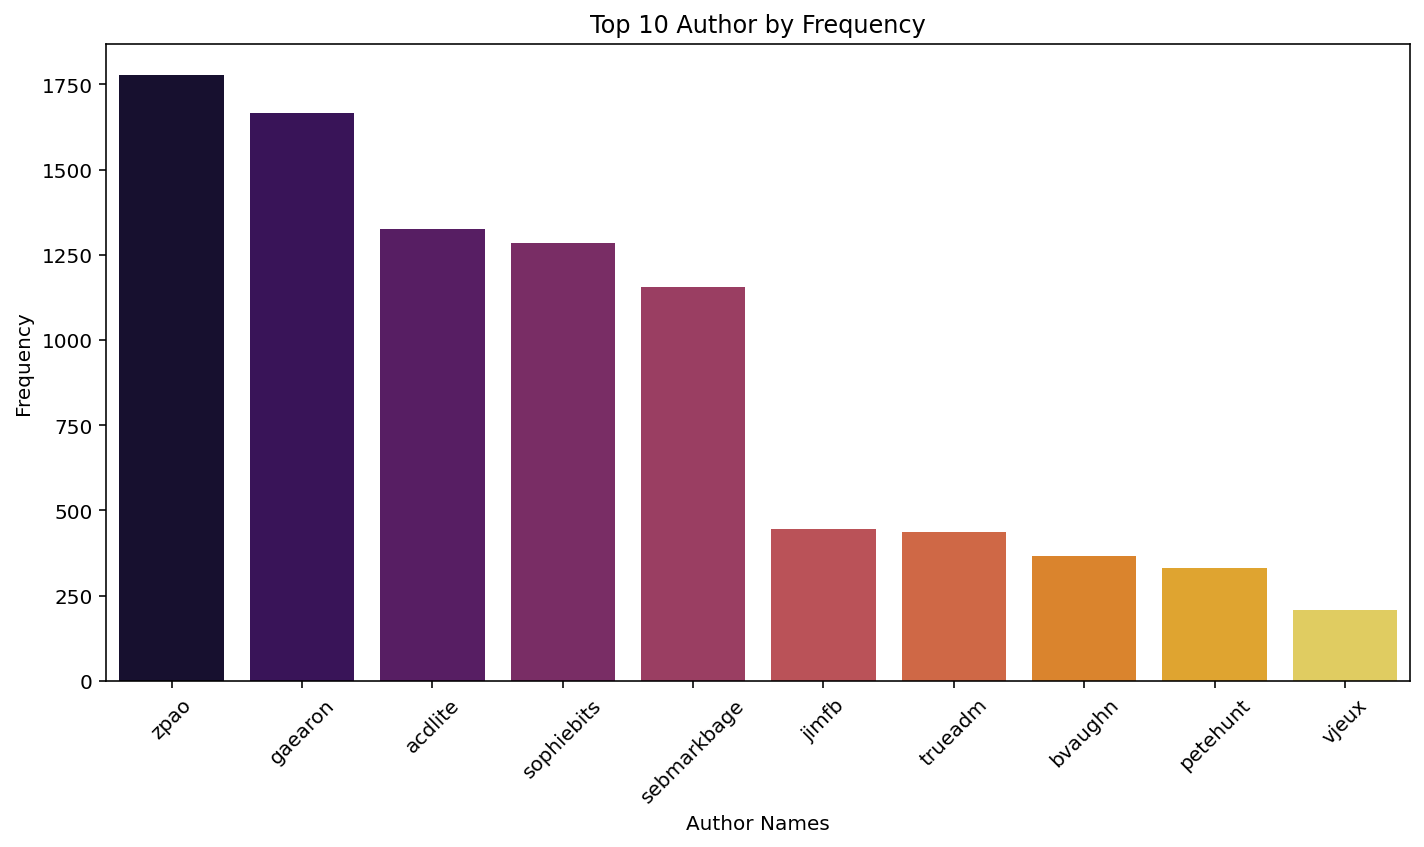

In [83]:
# Assuming 'react' is your DataFrame
top_10_artists = react['author'].value_counts().head(10).reset_index()
top_10_artists.columns = ['Author', 'Frequency']

# Create a bar plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Author', y='Frequency', data=top_10_artists, palette="inferno")
plt.xticks(rotation=45)
plt.xlabel('Author Names')
plt.ylabel('Frequency')
plt.title('Top 10 Author by Frequency')
plt.tight_layout()
plt.show()


### Remove Outliers

In [84]:
from sklearn.ensemble import IsolationForest

features = [ 'additions', 'deletions', 'numfiles','net_code_change']

## We'll do a simple drop null for now
react = react.dropna()

## Create a training-test set
X = react[features]
X_train = X[:12000]  # Adjusting the training set size
X_test = X[1000:]    # It seems there might be an indexing issue here; it's assuming X[1000:] is the test set, let's adjust this.

## Fit Model
clf = IsolationForest(n_estimators=50, max_samples=100)
clf.fit(X_train)

## Get Scores
react['scores'] = clf.decision_function(X)
react['anomaly'] = clf.predict(X)

## Get Anomalies
outliers = react.loc[react['anomaly'] == -1]

outliers

,author,date,additions,deletions,message,numfiles,[files],net_code_change,scores,anomaly
2,gnoff,2023-09-27 17:03:57+00:00,6733,21,[Flight] Implement `react-server-dom-turbopack...,68,"['.eslintrc.js', 'packages/react-client/src/fo...",6712,-0.273457,-1
3,gnoff,2023-09-27 16:53:31+00:00,1021,288,[Flight][Float] Preinitialize module imports d...,48,"['fixtures/flight-esm/.nvmrc', 'fixtures/fligh...",733,-0.216331,-1
4,gnoff,2023-09-26 16:59:39+00:00,1710,689,[Fizz][Float] Refactor Resources (#27400) Re...,11,['packages/react-dom-bindings/src/server/React...,1021,-0.222398,-1
5,sebmarkbage,2023-09-25 23:02:25+00:00,380,53,[Fizz] Track postpones in fallbacks (#27421) ...,3,['packages/react-dom/src/__tests__/ReactDOMFiz...,327,-0.016409,-1
8,hoxyq,2023-09-25 16:02:13+00:00,406,291,refactor[devtools/extension]: refactored messa...,14,['packages/react-devtools-extensions/src/backg...,115,-0.071145,-1
...,...,...,...,...,...,...,...,...,...,...
15820,jeffmo,2013-06-06 21:44:56+00:00,1371,16,Improve Browser Support for `wheel` Event Thi...,6,"['src/core/ReactEventEmitter.js', 'src/diff.di...",1355,-0.163438,-1
15821,jeffmo,2013-06-06 21:40:30+00:00,457,440,Simplify Event Core Summary: This makes a few...,15,"['src/core/ReactEventEmitter.js', 'src/core/Re...",17,-0.113929,-1
15879,benjamn,2013-06-03 17:58:01+00:00,241,79,Merge pull request #1 from benjamn/run-tests-i...,24,"['Gruntfile.js', 'grunt/config/browserify.js',...",162,-0.050829,-1
15955,petehunt,2013-05-30 11:11:07+00:00,52,226,more backbone fixes,5,"['examples/todomvc-backbone/css/base.css', 'ex...",-174,-0.069187,-1


In [85]:
react['anomaly'].value_counts()

 1    12318
-1     1805
Name: anomaly, dtype: int64

In [86]:
react = react.drop(react[react['anomaly'] == -1].index)
react= react.drop(columns=['anomaly','scores'])

In [87]:
#react
# Dropping columns that could lead to data leakage
df_react= react.drop(columns=['author','date', 'message','[files]'])

In [88]:
df_react.head(2)

,additions,deletions,numfiles,net_code_change
0,0,1,1,-1
1,1,0,1,1


In [89]:
df_react.describe()

,additions,deletions,numfiles,net_code_change
count,12318.000000,12318.000000,12318.000000,12318.000000
mean,32.461195,13.724387,2.553093,18.736808
std,49.540812,25.982828,2.633784,43.067043
min,0.000000,0.000000,0.000000,-129.000000
25%,2.000000,1.000000,1.000000,0.000000
50%,9.000000,3.000000,1.000000,2.000000
75%,41.000000,13.000000,3.000000,22.000000
max,296.000000,209.000000,24.000000,268.000000


In [90]:
corr = df_react.corr()
corr.style.background_gradient(cmap='coolwarm')
# 'RdBu_r', 'BrBG_r', & PuOr_r are other good diverging colormaps

,additions,deletions,numfiles,net_code_change
additions,1.000000,0.495113,0.398353,0.851611
deletions,0.495113,1.000000,0.412624,-0.033774
numfiles,0.398353,0.412624,1.000000,0.209292
net_code_change,0.851611,-0.033774,0.209292,1.000000


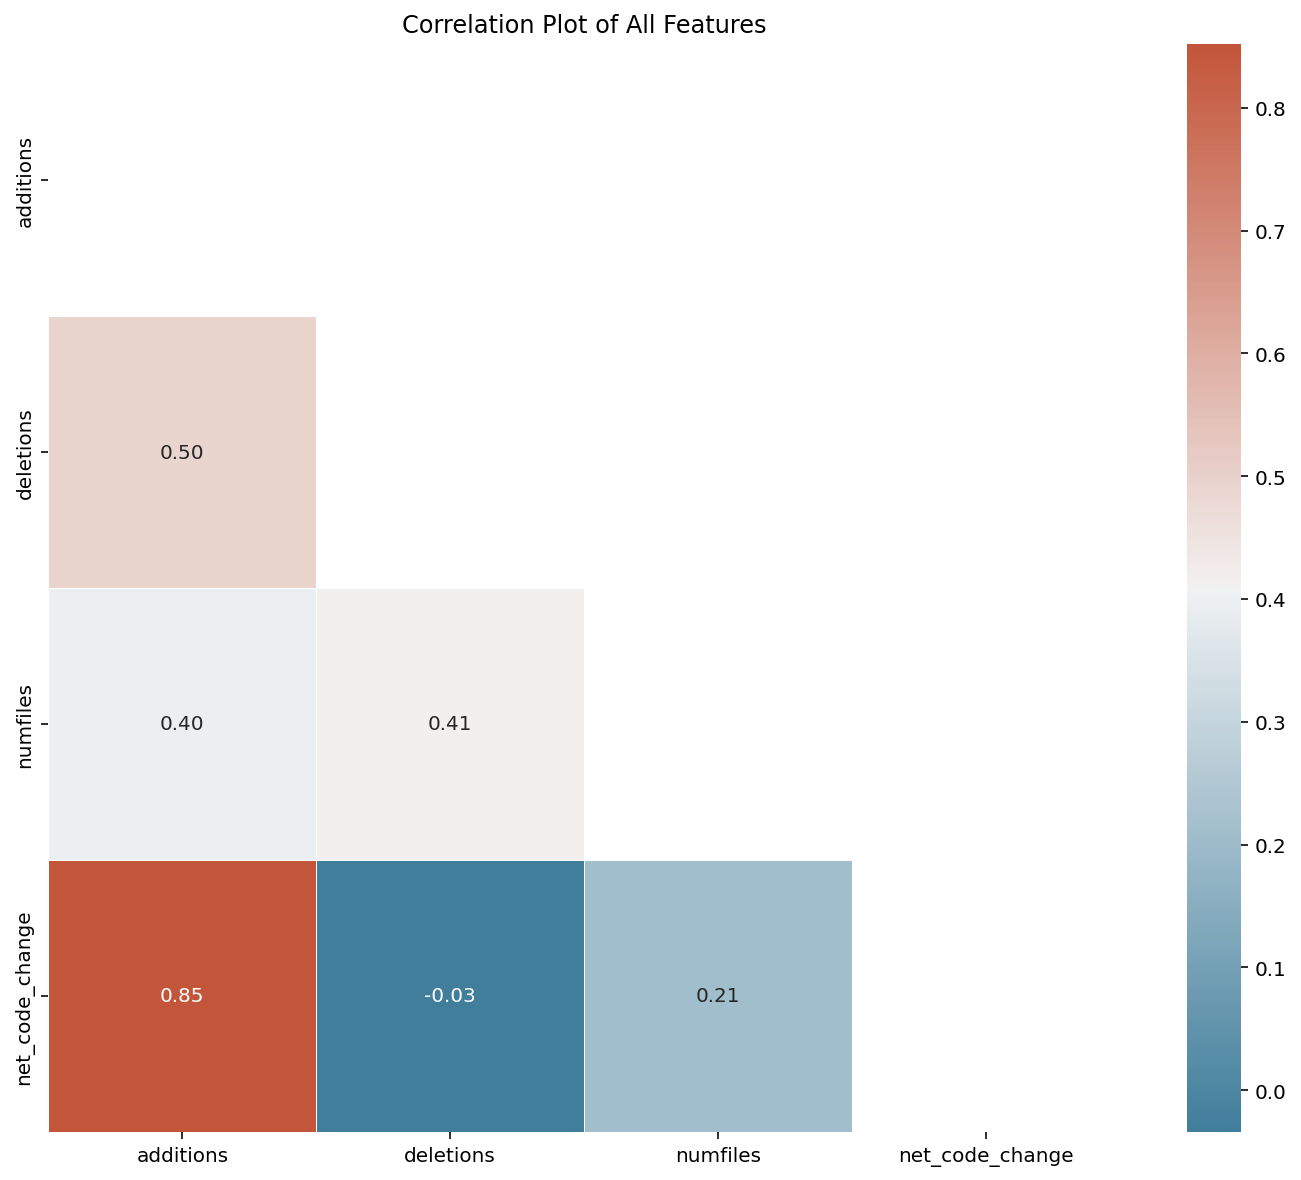

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix for all numerical features in your DataFrame
corr = df_react.corr()

# Set up the matplotlib figure and adjust its size
plt.figure(figsize=(12, 10))

# Generate a mask for the upper triangle (otherwise this looks like the square we had above and is redundant)
mask = np.triu(np.ones_like(corr, dtype=bool))

# Create a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap
sns.heatmap(corr, mask=mask, cmap=cmap, annot=True, fmt=".2f", linewidths=.5)

plt.title('Correlation Plot of All Features')
plt.show()



In [92]:
df_react.describe()

,additions,deletions,numfiles,net_code_change
count,12318.000000,12318.000000,12318.000000,12318.000000
mean,32.461195,13.724387,2.553093,18.736808
std,49.540812,25.982828,2.633784,43.067043
min,0.000000,0.000000,0.000000,-129.000000
25%,2.000000,1.000000,1.000000,0.000000
50%,9.000000,3.000000,1.000000,2.000000
75%,41.000000,13.000000,3.000000,22.000000
max,296.000000,209.000000,24.000000,268.000000


In [93]:
df_react.columns

Index(['additions', 'deletions', 'numfiles', 'net_code_change'], dtype='object')

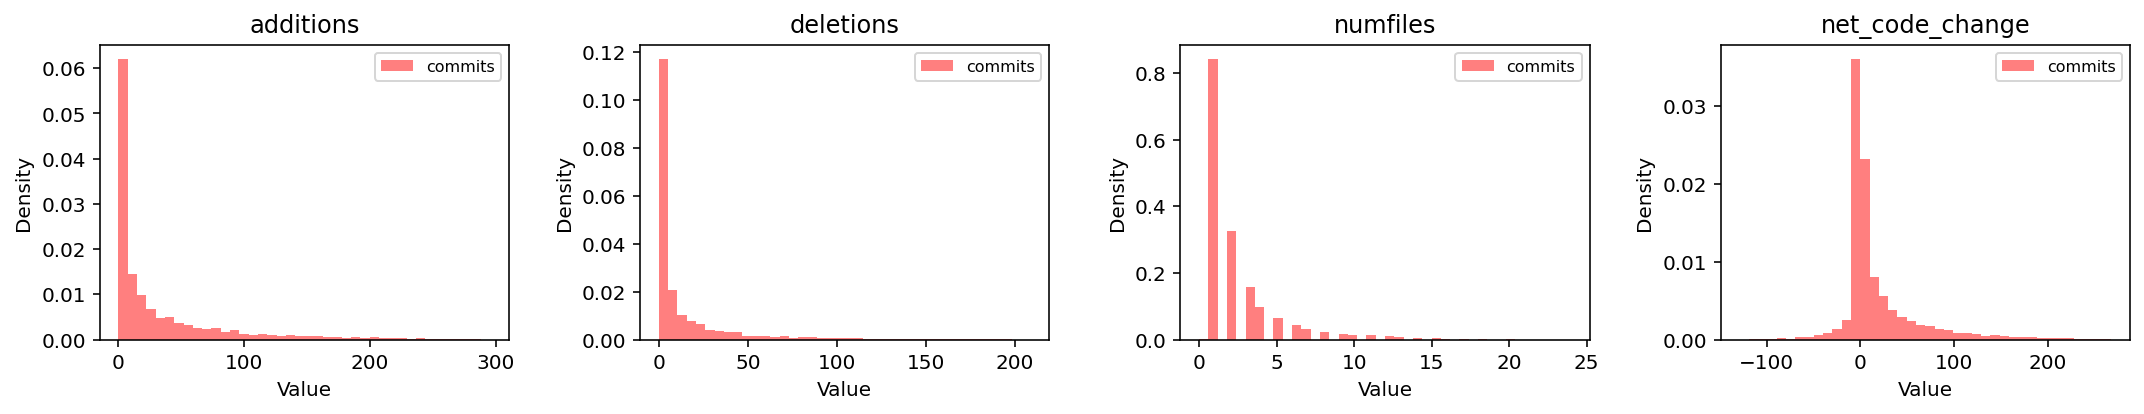

In [94]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Simulating a DataFrame similar to the one mentioned by the user.
# The actual DataFrame 'df_react' should be used when running this code.
# The DataFrame here is just for demonstration purposes.




_, axes = plt.subplots(1, 4, figsize=(15, 3))

malignant = df_react

ax = axes.ravel()

for i in range(4):  
    bins = 40
    ax[i].hist(malignant.iloc[:, i], bins=bins, color='r', alpha=0.5, label='commits', density=True)
    ax[i].set_title(df_react.columns[i], fontsize=12)
    ax[i].legend(loc='best', fontsize=8)
    ax[i].set_xlabel('Value')  # X-axis label
    ax[i].set_ylabel('Density')  # Y-axis label

plt.tight_layout()
plt.show()


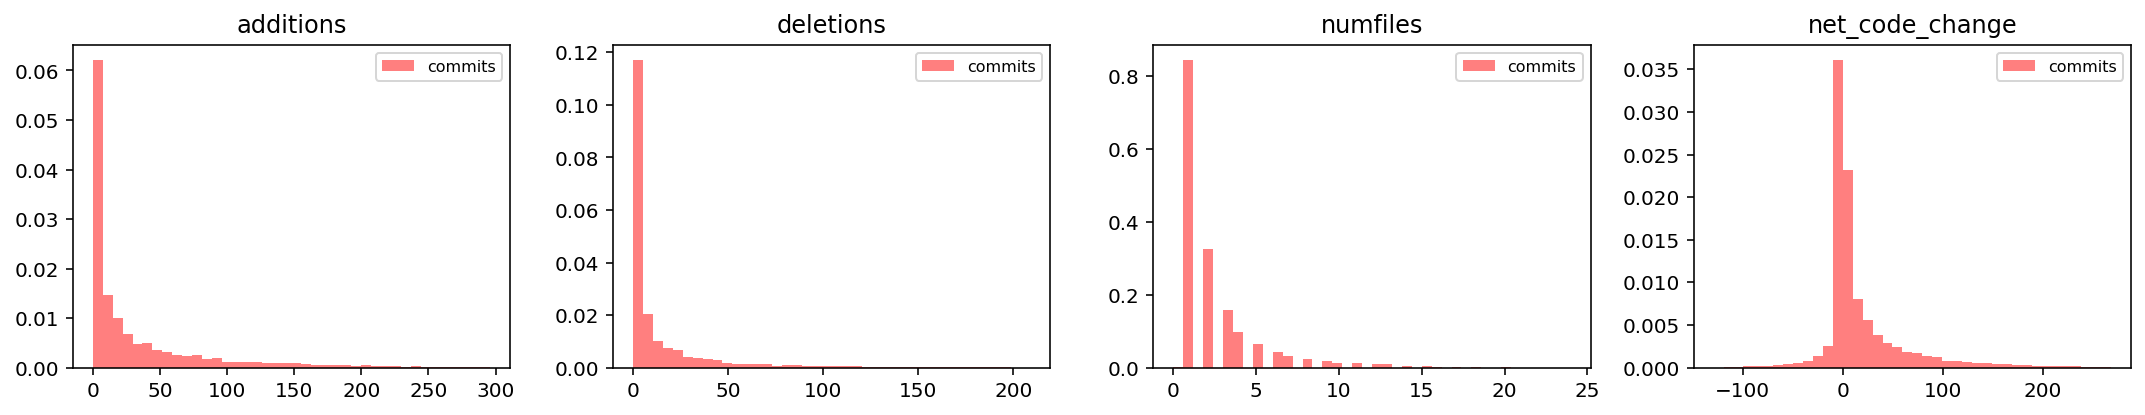

In [95]:
import numpy as np
import matplotlib.pyplot as plt

_, axes = plt.subplots(1, 4, figsize=(15, 3))

malignant = df_react

ax = axes.ravel()  

for i in range(4):  
    bins = 40
    ax[i].hist(malignant.iloc[:, i], bins=bins, color='r', alpha=0.5, label='commits', density=True)
    ax[i].set_title(df_react.columns[i], fontsize=12)
    ax[i].legend(loc='best', fontsize=8)

plt.tight_layout()
plt.show()

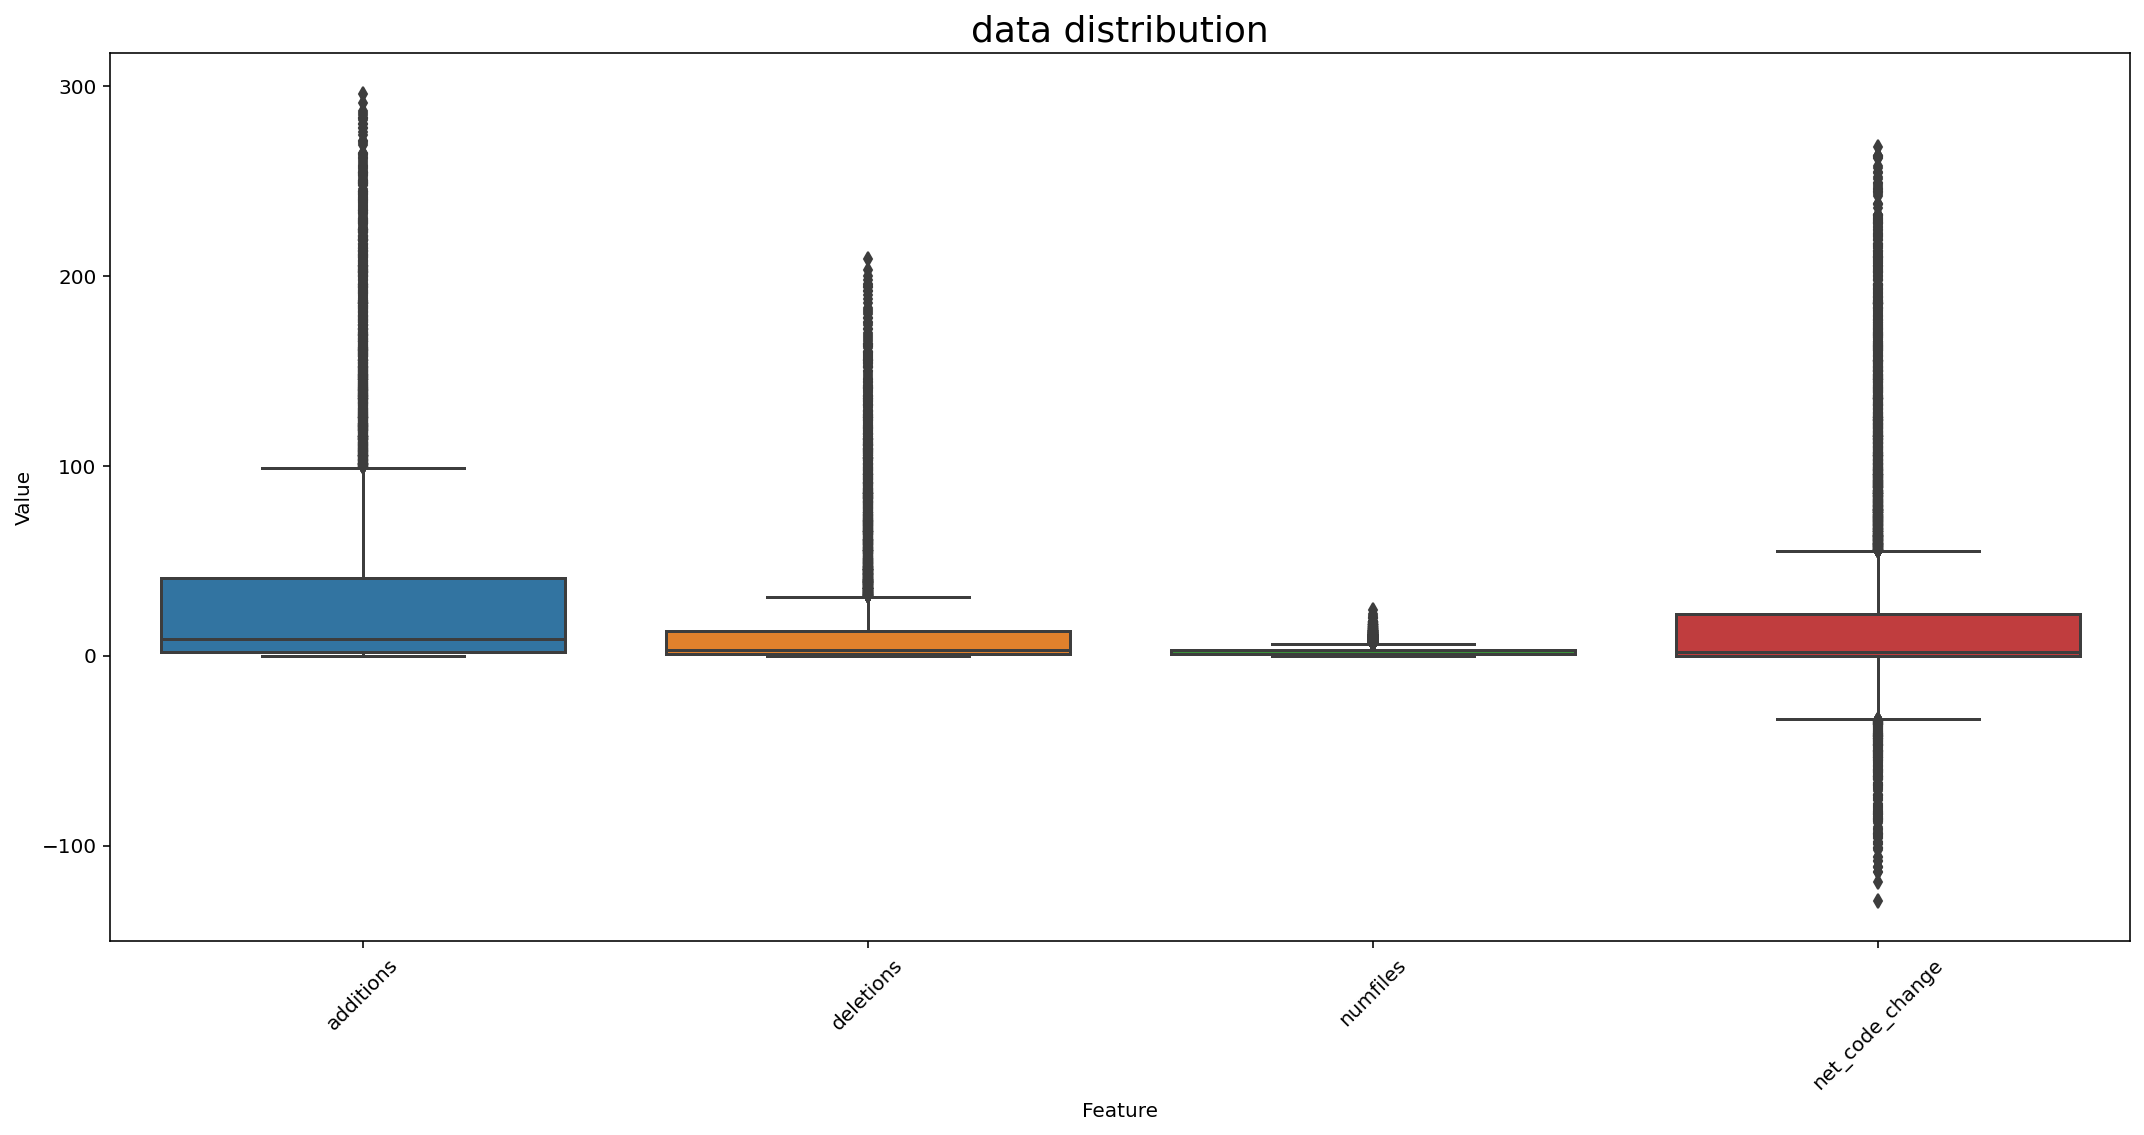

In [96]:
df_num_dis= df_react

# Stacking the data for a single box plot
stacked_data = df_num_dis.melt(var_name='Feature', value_name='Value')

# Create a single box plot
plt.figure(figsize=(15, 8))  # Adjust the figure size as needed
sns.boxplot(data=stacked_data, x='Feature', y='Value')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.title('data distribution',size=18)
plt.tight_layout()
plt.show()


{'bodies': [<matplotlib.collections.PolyCollection at 0x200dc8250a0>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x200dd0e3af0>,
 'cmins': <matplotlib.collections.LineCollection at 0x200dd0e3490>,
 'cbars': <matplotlib.collections.LineCollection at 0x200dd0e3160>}

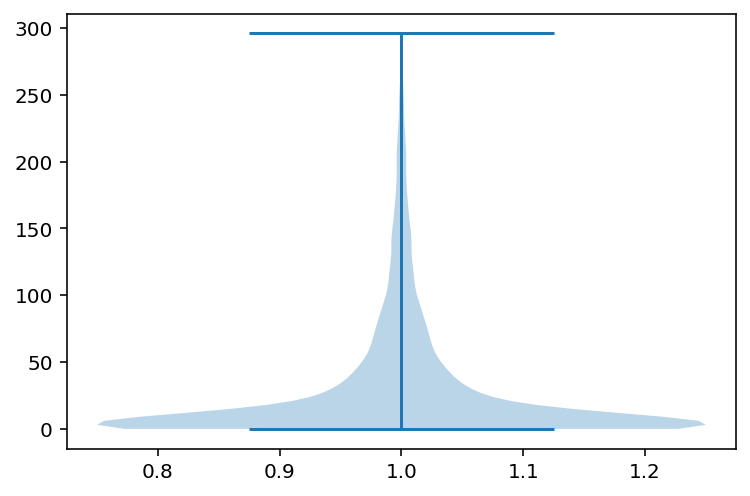

In [97]:
plt.violinplot(df_react['additions'])

In [98]:
df_react.head()

,additions,deletions,numfiles,net_code_change
0,0,1,1,-1
1,1,0,1,1
6,27,10,8,17
7,18,18,1,0
9,64,9,2,55


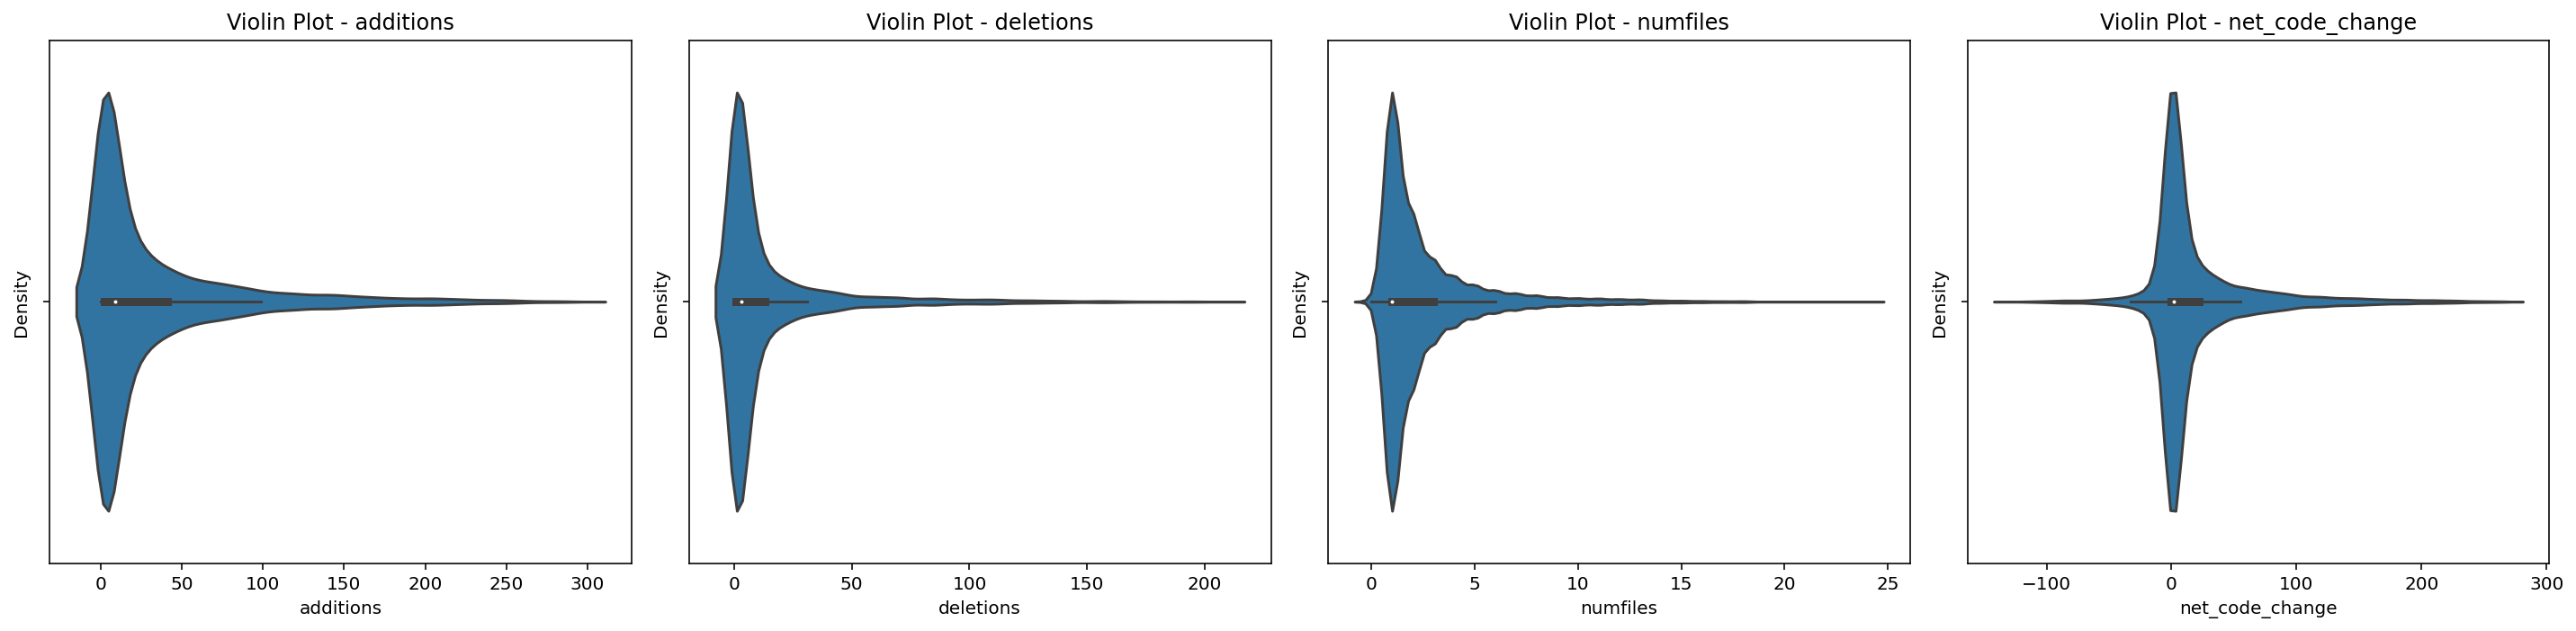

In [99]:
#violin plots
fig, axes = plt.subplots(1, 4, figsize=(20, 5))  # Five subplots for five violin plots

# Plot multiple violin plots
sns.violinplot(x=df_react["additions"], ax=axes[0])
axes[0].set_title('Violin Plot - additions')
axes[0].set_xlabel('additions')
axes[0].set_ylabel('Density')

sns.violinplot(x=df_react["deletions"], ax=axes[1])
axes[1].set_title('Violin Plot - deletions')
axes[1].set_xlabel('deletions')
axes[1].set_ylabel('Density')

sns.violinplot(x=df_react["numfiles"], ax=axes[2])
axes[2].set_title('Violin Plot - numfiles')
axes[2].set_xlabel('numfiles')
axes[2].set_ylabel('Density')

sns.violinplot(x=df_react["net_code_change"], ax=axes[3])
axes[3].set_title('Violin Plot - net_code_change')
axes[3].set_xlabel('net_code_change')
axes[3].set_ylabel('Density')

# Adjust layout
plt.tight_layout()

# Display the plots
plt.show()

In [100]:
df_react.describe()


,additions,deletions,numfiles,net_code_change
count,12318.000000,12318.000000,12318.000000,12318.000000
mean,32.461195,13.724387,2.553093,18.736808
std,49.540812,25.982828,2.633784,43.067043
min,0.000000,0.000000,0.000000,-129.000000
25%,2.000000,1.000000,1.000000,0.000000
50%,9.000000,3.000000,1.000000,2.000000
75%,41.000000,13.000000,3.000000,22.000000
max,296.000000,209.000000,24.000000,268.000000


#### authors 

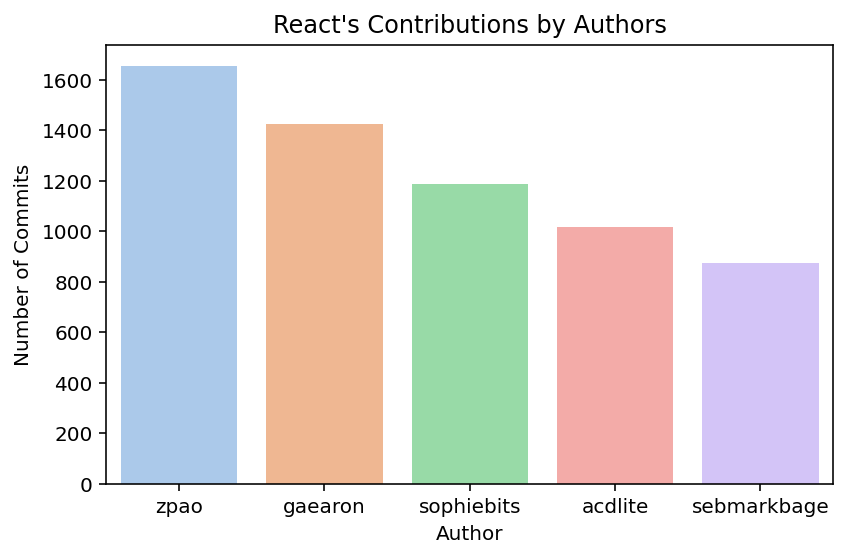

In [101]:
plt.figure(figsize=(6, 4))
sns.countplot(x='author', data=react,order=pd.value_counts(react['author']).iloc[:5].index, palette='pastel')
plt.title("React's Contributions by Authors")
plt.xlabel('Author')
plt.ylabel('Number of Commits')
plt.tight_layout()
plt.show()

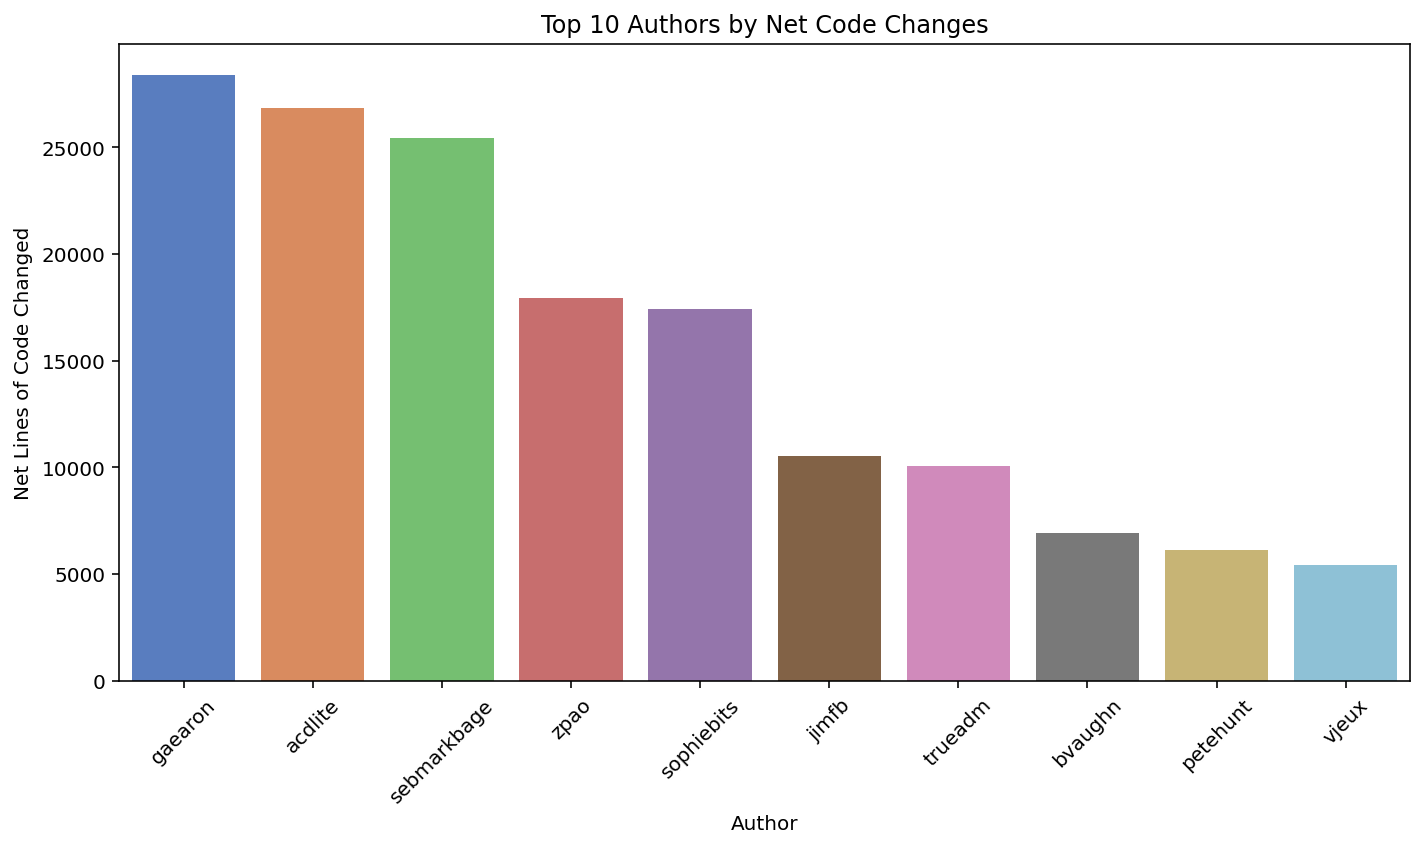

In [102]:
# Group by author and sum up the net code changes
author_net = react.groupby('author')['net_code_change'].sum().reset_index()
author_net = author_net.nlargest(10, 'net_code_change')

# Plotting the top 10 authors by net code changes
plt.figure(figsize=(10, 6))
sns.barplot(x='author', y='net_code_change', data=author_net, palette='muted')
plt.title('Top 10 Authors by Net Code Changes')
plt.xlabel('Author')
plt.ylabel('Net Lines of Code Changed')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [103]:
file_changes = react.groupby('[files]')['net_code_change'].sum().reset_index()
file_changes = file_changes.sort_values(by='net_code_change', ascending=False)
file_changes.head()


,[files],net_code_change
1768,['packages/eslint-plugin-react-hooks/__tests__...,2484
231,['CHANGELOG.md'],1927
4717,"['src/core/ReactCompositeComponent.js', 'src/c...",1788
2936,"['packages/react-events/src/Press.js', 'packag...",1217
174,"['.mailmap', 'AUTHORS']",832


##### Net Commit Changes Over Time for Top Authors

In [104]:
author_changes = react.groupby(['author', pd.Grouper(key='date', freq='D')])['net_code_change'].sum().reset_index()
#top authors based on total net code change
top_authors = author_changes.groupby('author')['net_code_change'].sum().nlargest(3).index
# Filtering data 
top_author_changes = author_changes[author_changes['author'].isin(top_authors)]
# Pivoting data to have authors as columns
pivot_table = top_author_changes.pivot(index='date', columns='author', values='net_code_change').fillna(0)


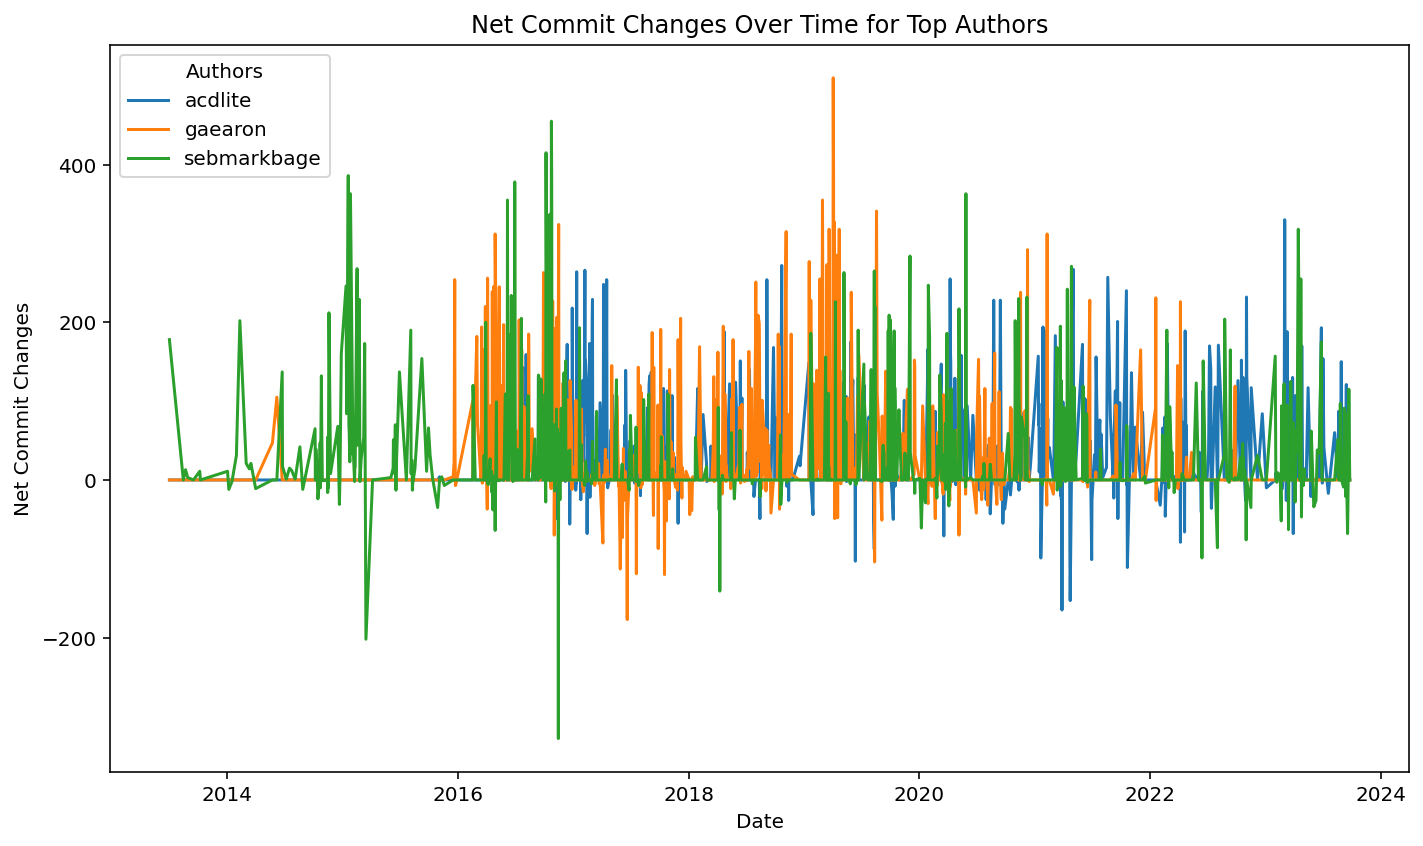

In [105]:
author_changes = react.groupby(['author', pd.Grouper(key='date', freq='D')])['net_code_change'].sum().reset_index()
#top authors based on total net code change
top_authors = author_changes.groupby('author')['net_code_change'].sum().nlargest(3).index
# Filtering data 
top_author_changes = author_changes[author_changes['author'].isin(top_authors)]
# Pivoting data to have authors as columns
pivot_table = top_author_changes.pivot(index='date', columns='author', values='net_code_change').fillna(0)


plt.figure(figsize=(10, 6))
sns.lineplot(data=pivot_table, dashes=False)
plt.xlabel('Date')
plt.ylabel('Net Commit Changes')
plt.title('Net Commit Changes Over Time for Top Authors')
plt.legend(title='Authors', loc='upper left')
plt.tight_layout()
plt.show()

In [106]:
df = react 

#### Author Contributions Over Time

c:\Users\Ethan Vaz Falcao\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


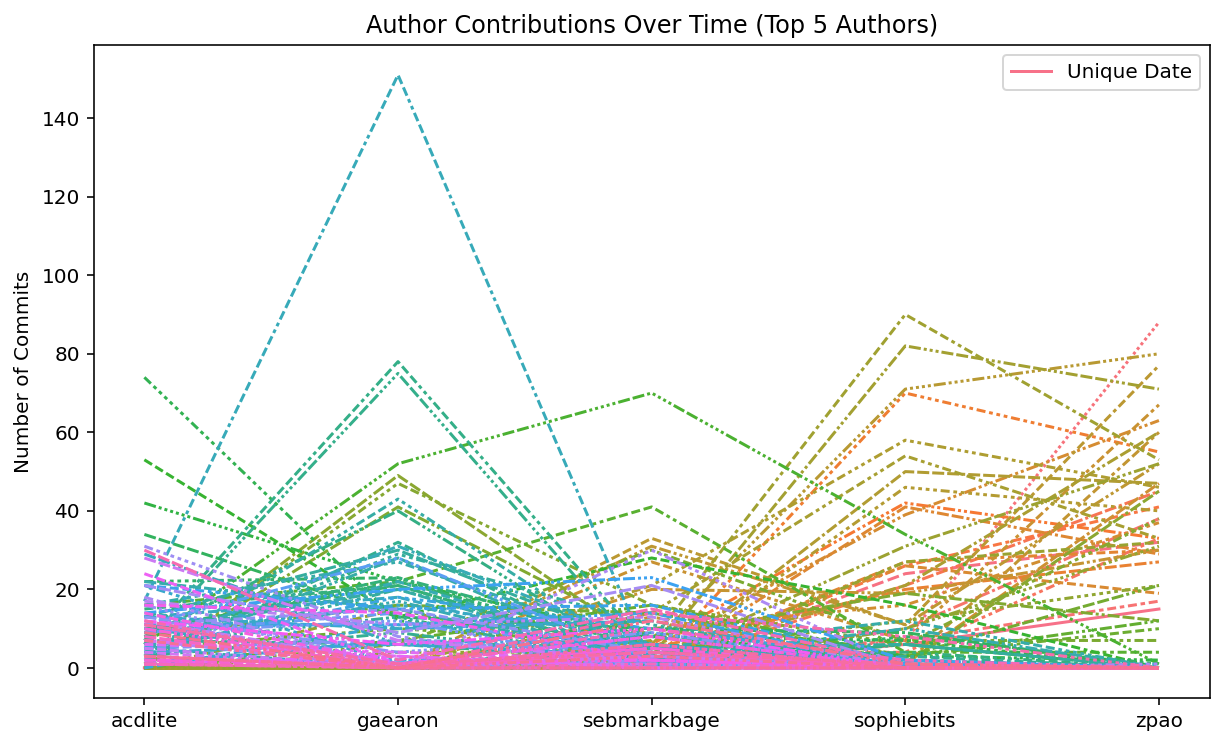

In [107]:
top_authors = df['author'].value_counts().head(5).index  # Considering top 3 authors

plt.figure(figsize=(10, 6))
sns.lineplot(data=df[df['author'].isin(top_authors)]
             .groupby([df['author'], df['date'].dt.to_period('M')]).size().unstack().fillna(0))
plt.title('Author Contributions Over Time (Top 5 Authors)')  # Update title for top 3 authors
plt.xlabel('')  # Empty x-axis label to remove 'Date' key
plt.ylabel('Number of Commits')
plt.legend().remove()  # Remove the legend
plt.legend(['Unique Date'], loc='upper right')
plt.show()


c:\Users\Ethan Vaz Falcao\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


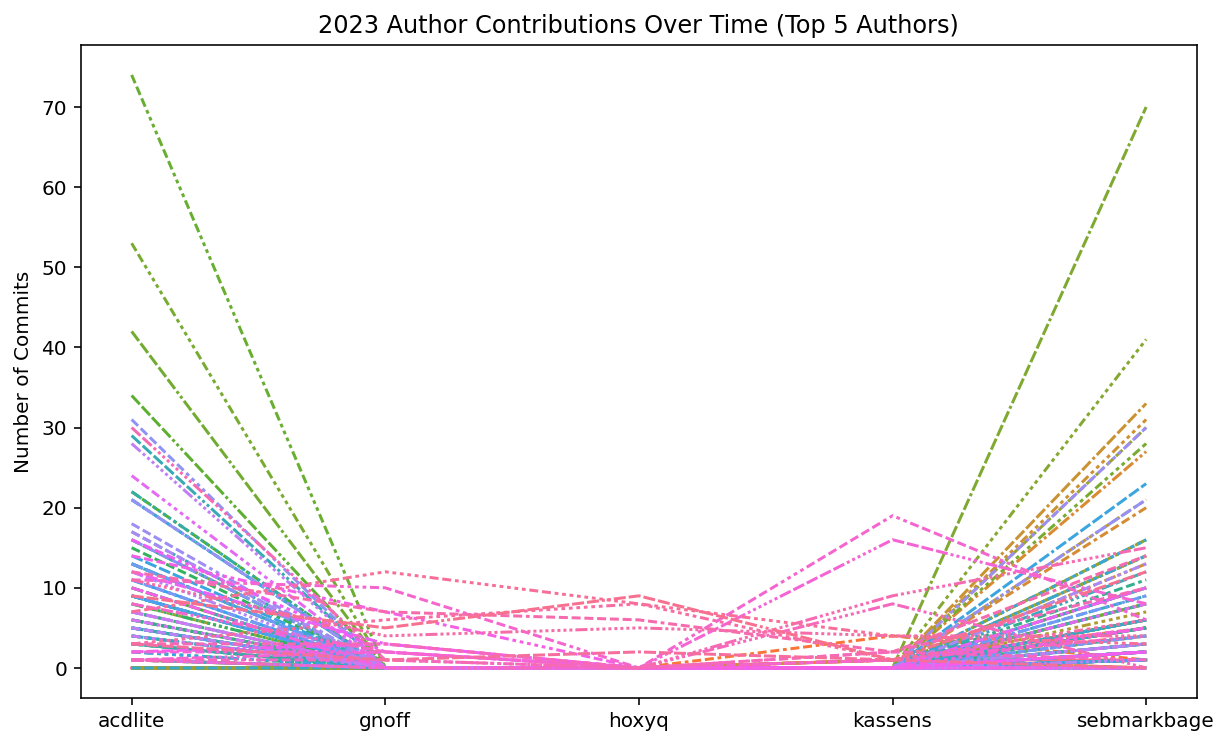

In [108]:
top_authors = df[df['date'].dt.year == 2023]['author'].value_counts().head(5).index  # Considering top 5 authors for the year 2023

plt.figure(figsize=(10, 6))
sns.lineplot(data=df[df['author'].isin(top_authors)]
             .groupby([df['author'], df['date'].dt.to_period('M')]).size().unstack().fillna(0))
plt.title('2023 Author Contributions Over Time (Top 5 Authors)')  # Update title for top 3 authors
plt.xlabel('')  # Empty x-axis label to remove 'Date' key
plt.ylabel('Number of Commits')
plt.legend().remove()  # Remove the legend
plt.show()


#### Code Changes by Time of Day

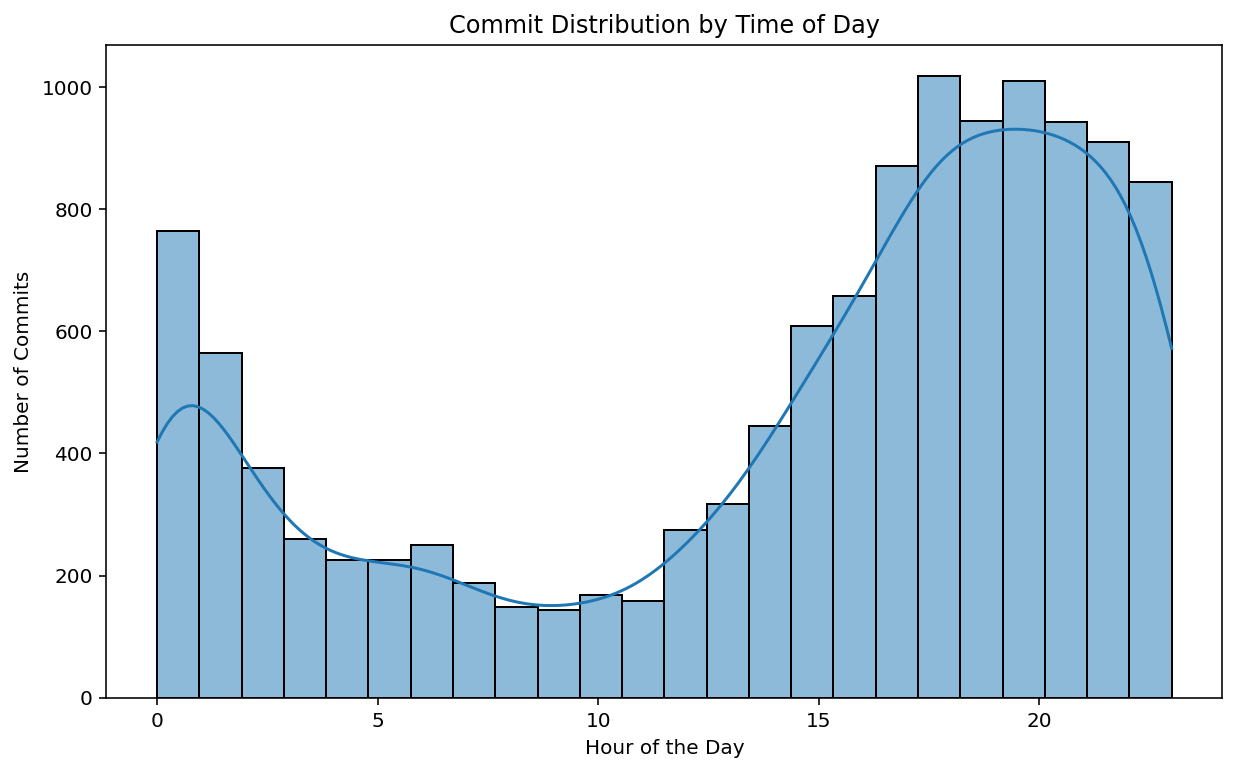

In [109]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x=df['date'].dt.hour, bins=24, kde=True)
plt.title('Commit Distribution by Time of Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Commits')
plt.show()


#### commit pattern analysis

In [110]:
top_authors = df['author'].value_counts().head(2).index

In [111]:
df_sorted = df.sort_values(by='date', ascending= True)
df_sorted

,author,date,additions,deletions,message,numfiles,[files],net_code_change
15886,benjamn,2013-05-28 17:04:45+00:00,2,2,Fix some silly uses of Function.prototype.bind...,1,['vendor/jasmine/jasmine-support.js'],0
15885,benjamn,2013-05-28 18:45:12+00:00,17,5,Expose test modules for requirement.,2,"['grunt/config/browserify.js', 'grunt/tasks/br...",12
15889,benjamn,2013-05-28 19:57:17+00:00,11,5,Make the bin/jsx source and output directories...,2,"['grunt/config/jsx/jsx.js', 'grunt/tasks/jsx.js']",6
15888,benjamn,2013-05-28 20:10:50+00:00,92,36,Use bin/jsx and browserify to build a jasmine ...,18,"['Gruntfile.js', 'grunt/config/browserify.js',...",56
15883,benjamn,2013-05-28 21:15:27+00:00,72,6,Run each test in an <iframe>.,3,"['test/frame.html', 'test/index.html', 'test/p...",66
...,...,...,...,...,...,...,...,...
9,sebmarkbage,2023-09-23 16:33:48+00:00,64,9,[Flight] Dedupe suspense boundaries when it ha...,2,['packages/react-dom/src/__tests__/ReactDOMFiz...,55
7,sebmarkbage,2023-09-25 16:26:17+00:00,18,18,[Fizz] Restrict types of keyPath when it is kn...,1,['packages/react-server/src/ReactFizzServer.js'],0
6,hoxyq,2023-09-25 17:24:52+00:00,27,10,React DevTools 4.28.3 -> 4.28.4 (#27419) * re...,8,"['packages/react-devtools-core/package.json', ...",17
1,gnoff,2023-09-27 17:39:04+00:00,1,0,publish `react-server-dom-turbopack` to canary...,1,['ReactVersions.js'],1


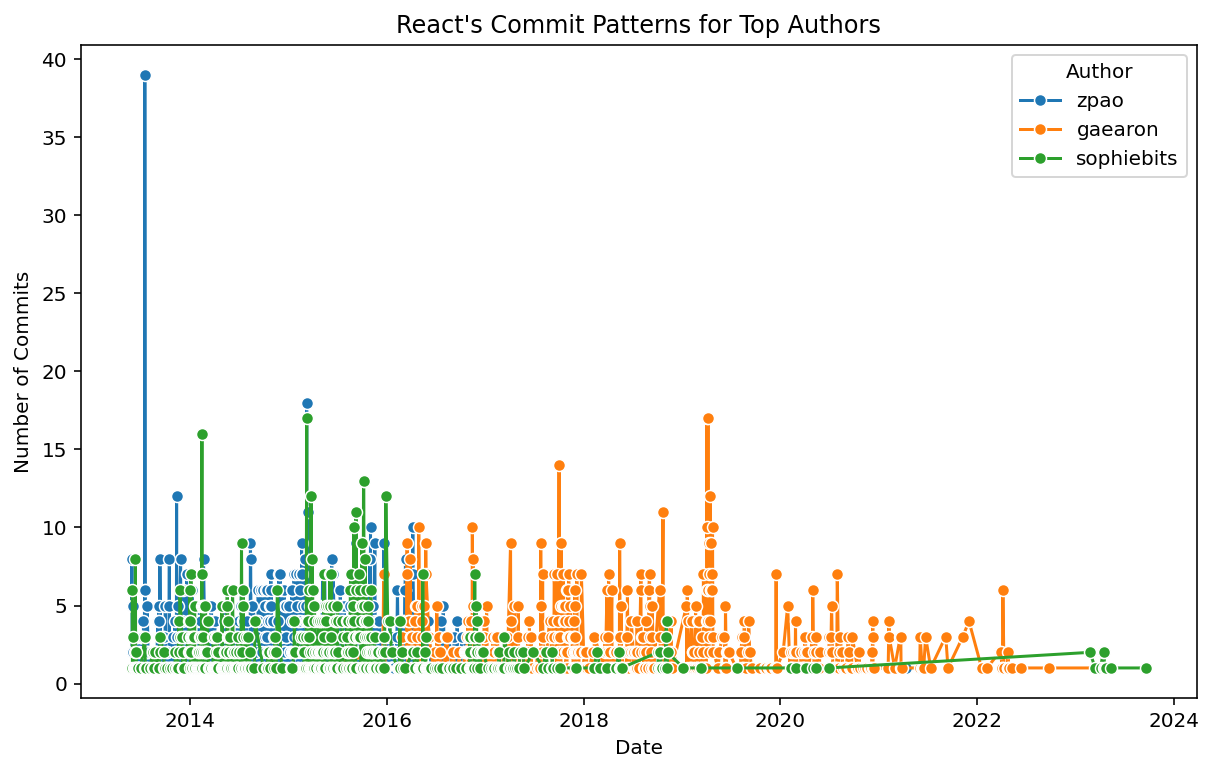

In [112]:
# Choose specific authors for commit pattern analysis
selected_authors = ['zpao', 'gaearon', 'sophiebits']

plt.figure(figsize=(10, 6))
for author in selected_authors:
    author_data = df[df['author'] == author]
    sns.lineplot(data=author_data.groupby(author_data['date'].dt.date).size(), label=author, marker='o')
plt.title("React's Commit Patterns for Top Authors")
plt.xlabel('Date')
plt.ylabel('Number of Commits')
plt.legend(title='Author')
plt.show()


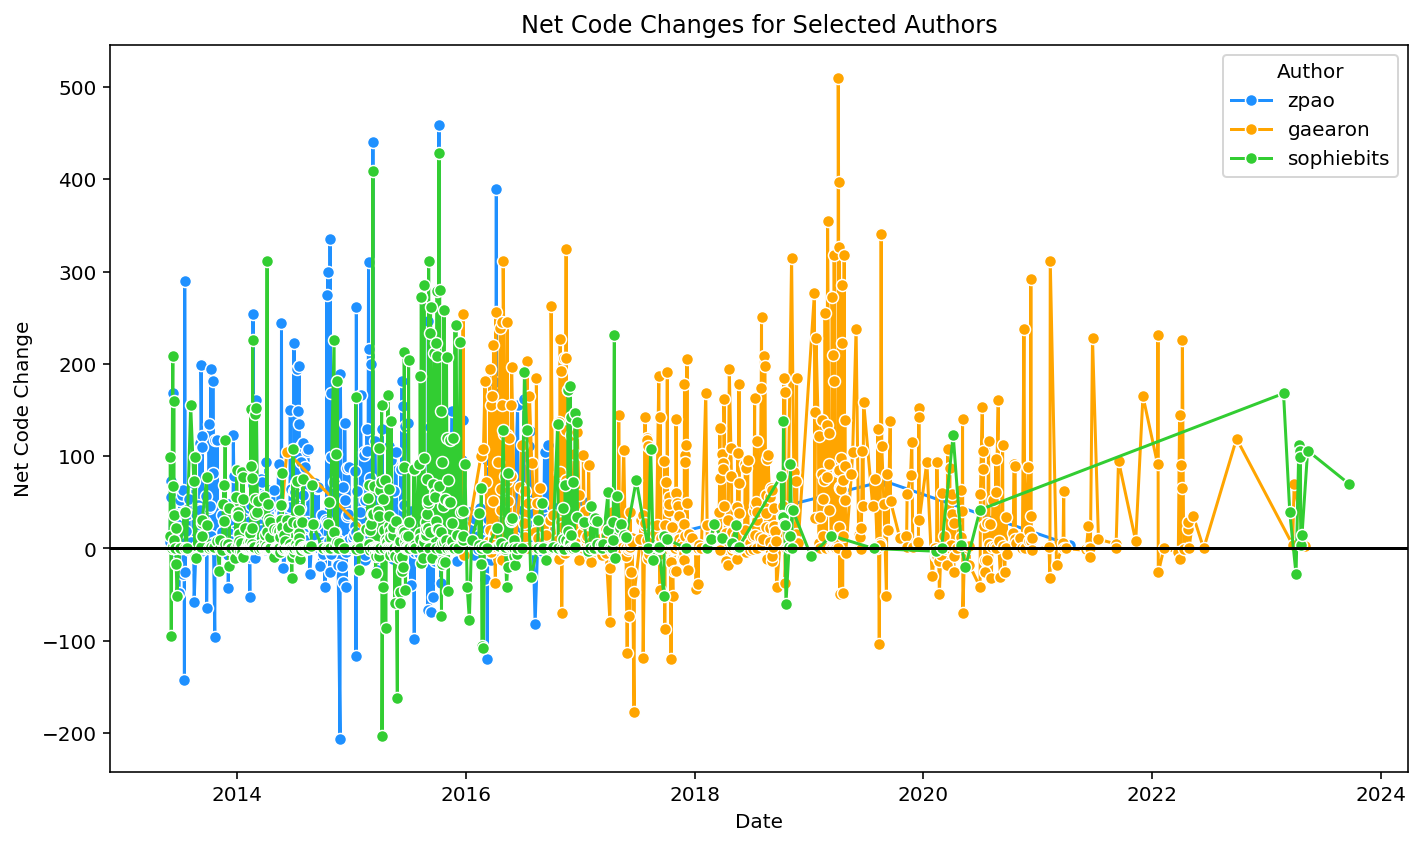

In [127]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'react' is your DataFrame and it's already defined
# Grouping by author and day, summing net_code_change
author_changes = react.groupby(['author', pd.Grouper(key='date', freq='D')])['net_code_change'].sum().reset_index()

# Define your selected authors and their colors
selected_authors = ['zpao', 'gaearon', 'sophiebits']
# Using named colors that are typical for blue, green, and orange
colors = {
    'zpao': 'dodgerblue',  # A shade of blue
    'gaearon': 'orange',  # A shade of orange
    'sophiebits': 'limegreen'  # A shade of green
}

# Plot settings
plt.figure(figsize=(10, 6))

# Loop through each author to plot their data
for author in selected_authors:
    # Filter data for the current author
    author_data = author_changes[author_changes['author'] == author]
    # Plotting the lineplot for each author with the specified color and marker
    sns.lineplot(x='date', y='net_code_change', data=author_data, label=author, 
                 color=colors[author], marker='o')

# Add a black horizontal line at the x-axis (y=0)
plt.axhline(0, color='black', linewidth=1.5)

plt.title("Net Code Changes for Selected Authors")
plt.xlabel("Date")
plt.ylabel("Net Code Change")
plt.legend(title='Author')
plt.tight_layout()
plt.show()


Weekly monthly trends 

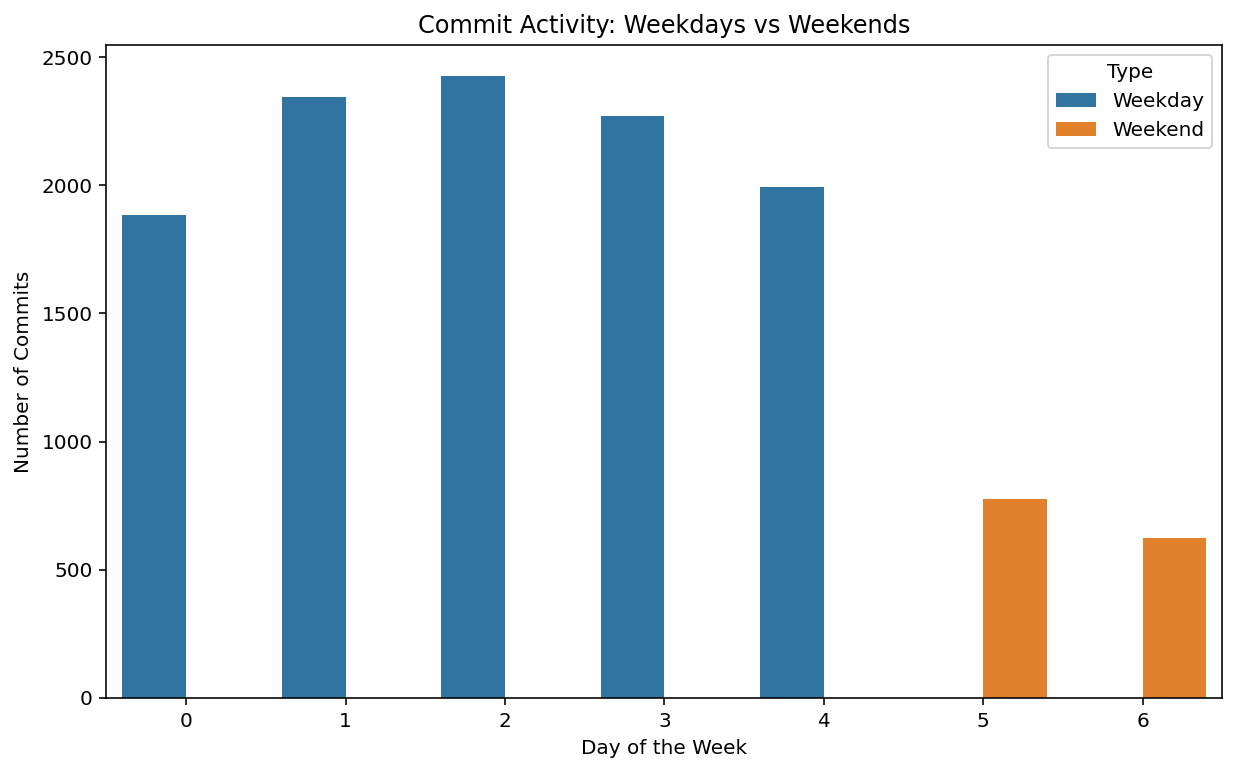

In [115]:
# Assign weekdays (0-4) and weekends (5-6) using dt.weekday
df['day_of_week'] = df['date'].dt.dayofweek

plt.figure(figsize=(10, 6))
sns.countplot(x='day_of_week', data=df, hue=df['day_of_week'].apply(lambda x: 'Weekend' if x >= 5 else 'Weekday'))
plt.title('Commit Activity: Weekdays vs Weekends')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Commits')
plt.legend(title='Type')
plt.show()


# Commit Messages

In [48]:
react.head()

,author,date,additions,deletions,message,numfiles,[files],net_code_change,day_of_week
0,gnoff,2023-09-27 23:17:45+00:00,0,1,"Revert ""publish `react-server-dom-turbopack` t...",1,['ReactVersions.js'],-1,2
1,gnoff,2023-09-27 17:39:04+00:00,1,0,publish `react-server-dom-turbopack` to canary...,1,['ReactVersions.js'],1,2
6,hoxyq,2023-09-25 17:24:52+00:00,27,10,React DevTools 4.28.3 -> 4.28.4 (#27419) * re...,8,"['packages/react-devtools-core/package.json', ...",17,0
7,sebmarkbage,2023-09-25 16:26:17+00:00,18,18,[Fizz] Restrict types of keyPath when it is kn...,1,['packages/react-server/src/ReactFizzServer.js'],0,0
9,sebmarkbage,2023-09-23 16:33:48+00:00,64,9,[Flight] Dedupe suspense boundaries when it ha...,2,['packages/react-dom/src/__tests__/ReactDOMFiz...,55,5


In [49]:
react.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12393 entries, 0 to 15982
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   author           12393 non-null  object             
 1   date             12393 non-null  datetime64[ns, UTC]
 2   additions        12393 non-null  int64              
 3   deletions        12393 non-null  int64              
 4   message          12393 non-null  object             
 5   numfiles         12393 non-null  int64              
 6   [files]          12393 non-null  object             
 7   net_code_change  12393 non-null  int64              
 8   day_of_week      12393 non-null  int64              
dtypes: datetime64[ns, UTC](1), int64(5), object(3)
memory usage: 1.2+ MB


### word count


In [50]:
import numpy as np
from PIL import Image
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords

In [51]:
# Concatenate all commit messages into a single string
all_messages = ' '.join(react['message'].astype(str))

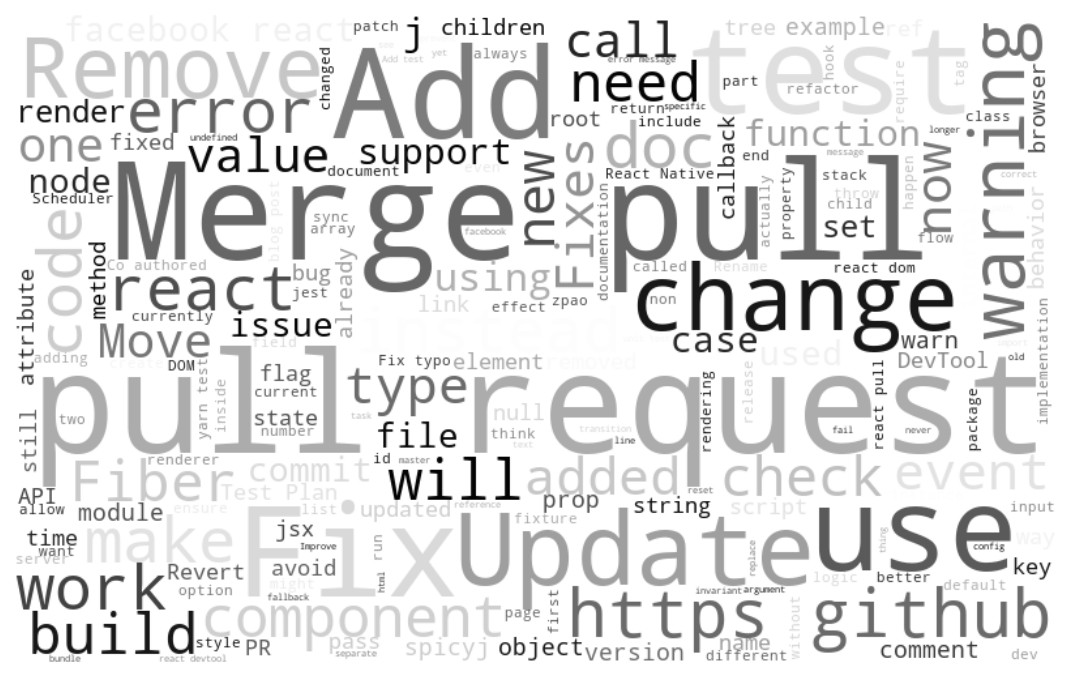

In [52]:
wc = WordCloud(background_color='white', colormap = 'binary',
      width = 800, height = 500).generate(all_messages)

plt.figure(figsize=(10, 6))  # Adjust the figsize as needed
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

[nltk_data] Downloading package punkt to C:\Users\Ethan Vaz
[nltk_data]     Falcao\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


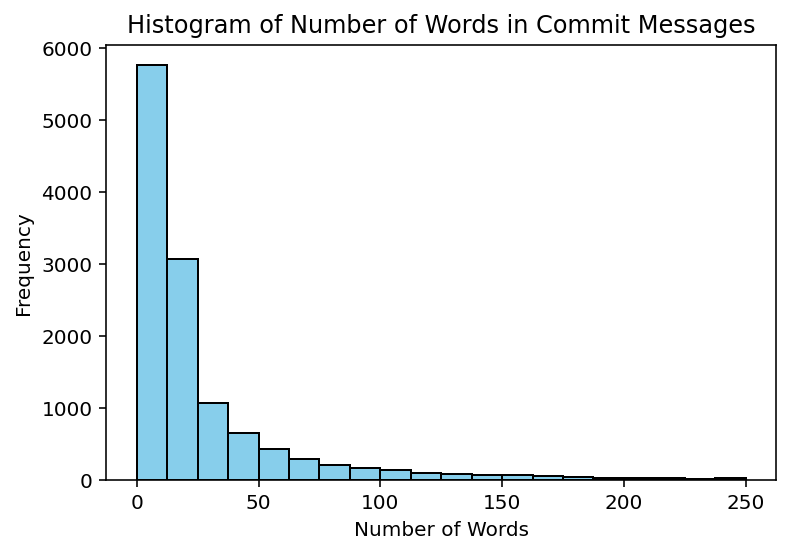

In [53]:
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize

# Download the NLTK punkt tokenizer
nltk.download('punkt')

# Function to count the number of words in a text
def count_words(text):
    tokens = word_tokenize(text)
    return len(tokens)

# Apply the count_words function to each commit message and create a new column
react['Word_Count'] = react['message'].apply(count_words)

# Create a histogram of the number of words
plt.hist(df['Word_Count'], bins=20, range=(0, 250),color='skyblue', edgecolor='black')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.title('Histogram of Number of Words in Commit Messages')
plt.show()


<AxesSubplot:xlabel='net_code_change', ylabel='Word_Count'>

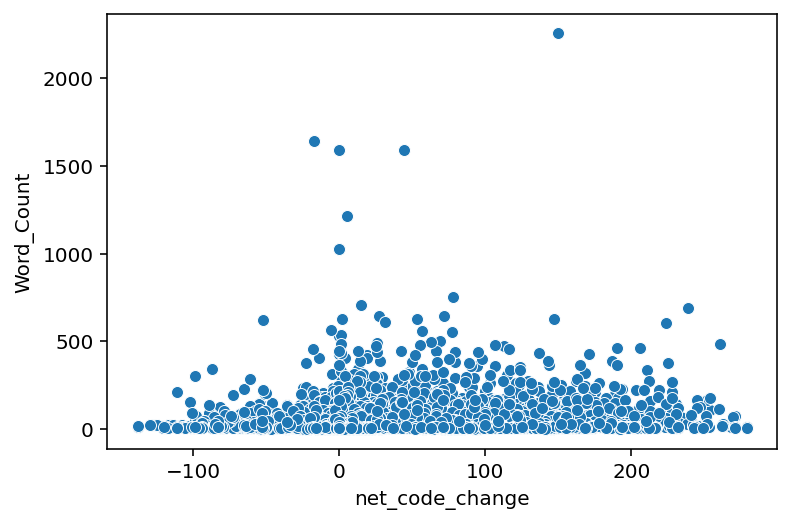

In [54]:
import seaborn as sns
sns.scatterplot(data= react, x='net_code_change', y='Word_Count')


##### Sentiment Analyzer

In [55]:
import pandas as pd
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

# Download the VADER lexicon for sentiment analysis
nltk.download('vader_lexicon')

def analyze_sentiment(text):
    sid = SentimentIntensityAnalyzer()
    sentiment_scores = sid.polarity_scores(text)
    
    # Classify the sentiment based on the compound score
    if sentiment_scores['compound'] >= 0.05:
        return 'Positive'
    elif sentiment_scores['compound'] <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment analysis to each commit message and create a new column
react['Sentiment'] = react['message'].apply(analyze_sentiment)

[nltk_data] Downloading package vader_lexicon to C:\Users\Ethan Vaz
[nltk_data]     Falcao\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [56]:
react[['message', 'Sentiment']]

,message,Sentiment
0,"Revert ""publish `react-server-dom-turbopack` t...",Positive
1,publish `react-server-dom-turbopack` to canary...,Neutral
6,React DevTools 4.28.3 -> 4.28.4 (#27419) * re...,Positive
7,[Fizz] Restrict types of keyPath when it is kn...,Negative
9,[Flight] Dedupe suspense boundaries when it ha...,Negative
...,...,...
15976,Merge pull request #3 from paulshen/spellings ...,Neutral
15978,Merge pull request #2 from paulshen/homebutton...,Neutral
15980,Fix live editor on mobile devices,Neutral
15981,Fix some URLs,Neutral


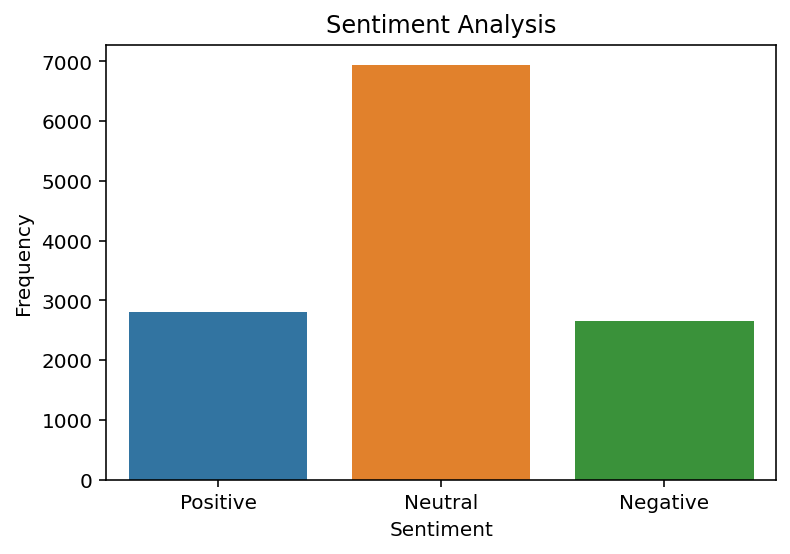

In [57]:
sns.countplot(x='Sentiment', data=react)

# Set plot labels and title
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.title('Sentiment Analysis')

# Show the plot
plt.show()

In [58]:
react.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12393 entries, 0 to 15982
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   author           12393 non-null  object             
 1   date             12393 non-null  datetime64[ns, UTC]
 2   additions        12393 non-null  int64              
 3   deletions        12393 non-null  int64              
 4   message          12393 non-null  object             
 5   numfiles         12393 non-null  int64              
 6   [files]          12393 non-null  object             
 7   net_code_change  12393 non-null  int64              
 8   day_of_week      12393 non-null  int64              
 9   Word_Count       12393 non-null  int64              
 10  Sentiment        12393 non-null  object             
dtypes: datetime64[ns, UTC](1), int64(6), object(4)
memory usage: 1.4+ MB


<AxesSubplot:xlabel='net_code_change', ylabel='Word_Count'>

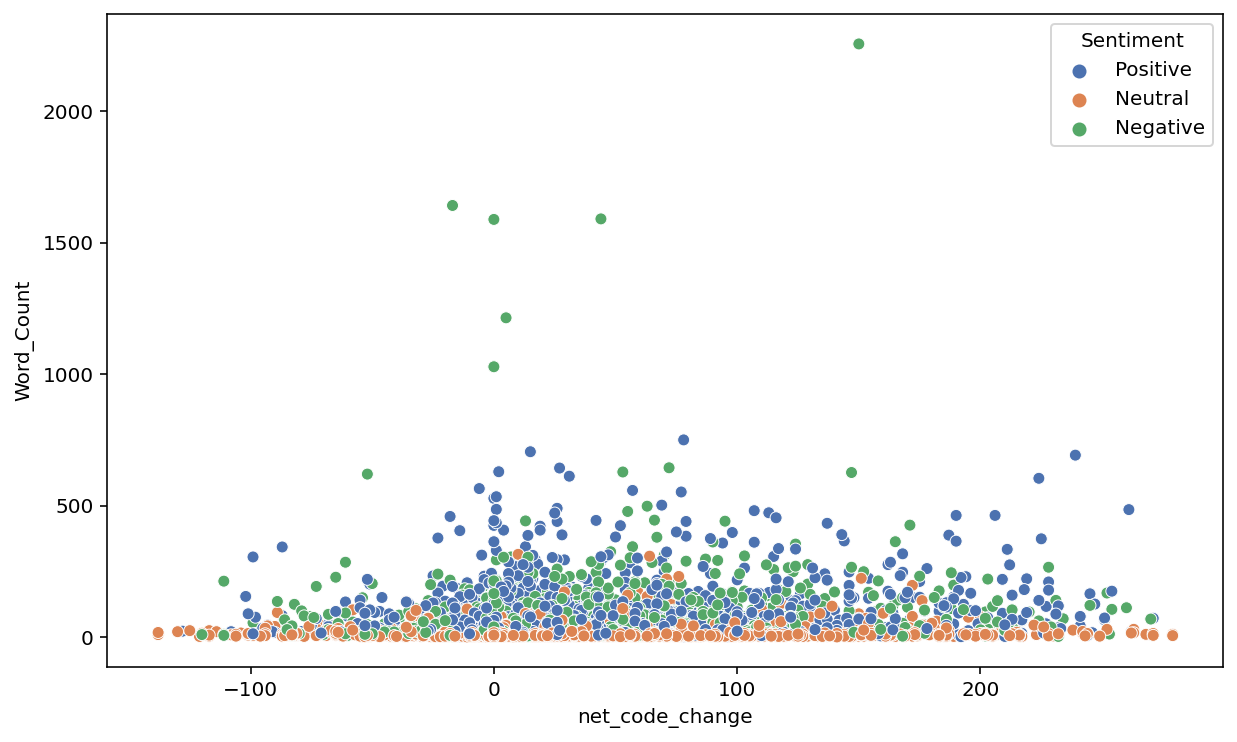

In [59]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=react, x='net_code_change', y='Word_Count', hue="Sentiment", palette="deep")


In [60]:
react_positive = react[react['Sentiment'] == 'Positive']

c:\Users\Ethan Vaz Falcao\anaconda3\lib\site-packages\statsmodels\genmod\families\links.py:187: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


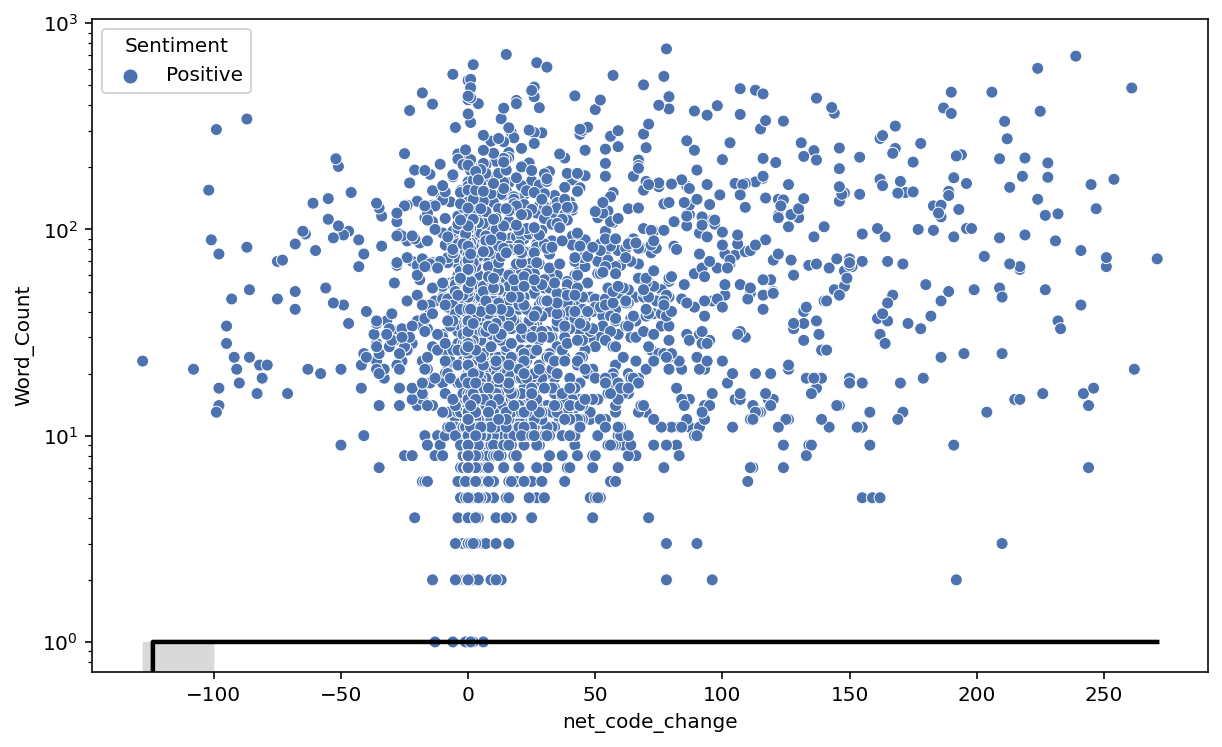

In [61]:
import statsmodels.api as sm

# Create the scatter plot with log scale on the y-axis
plt.figure(figsize=(10, 6))
sns.scatterplot(data=react_positive, x='net_code_change', y='Word_Count', hue="Sentiment", palette="deep")
plt.yscale('log')

# Add logistic regression line
sns.regplot(data=react_positive, x='net_code_change', y='Word_Count', logistic=True, scatter=False, color='black')

# Show the plot
plt.show()

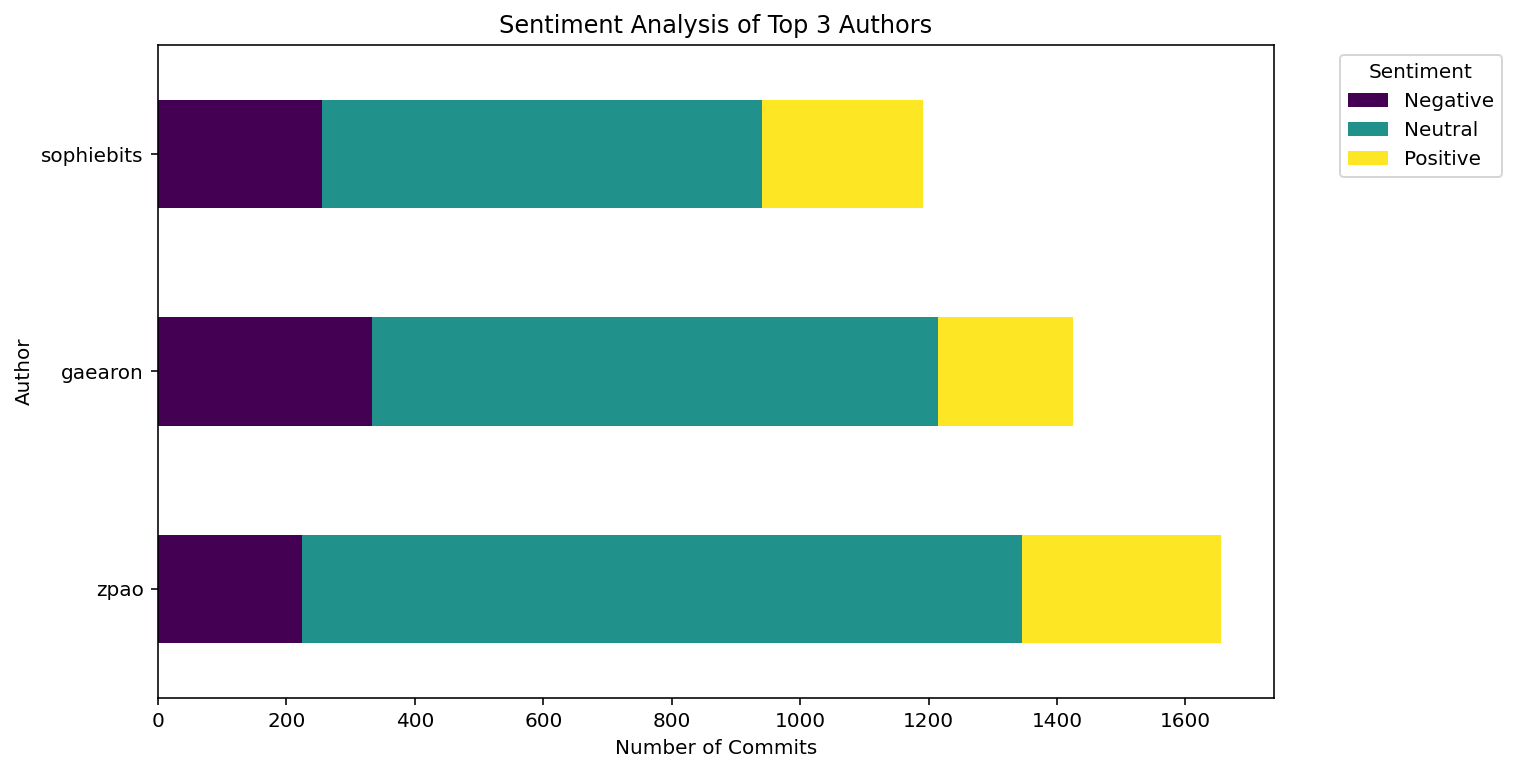

In [62]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
# Filter out rows with neutral sentiment (if needed)
df_filtered = df

# Group by author and sentiment, count the number of occurrences
grouped_df = df_filtered.groupby(['author', 'Sentiment']).size().unstack(fill_value=0)

# Get the top 3 authors based on the total number of commits
top_authors = grouped_df.sum(axis=1).nlargest(3).index

# Select only the rows for the top 3 authors
top_authors_df = grouped_df.loc[top_authors]

# Plot the horizontal stacked bar chart
ax = top_authors_df.plot(kind='barh', stacked=True, colormap='viridis', figsize=(10, 6))

# Set plot labels and title
plt.ylabel('Author')
plt.xlabel('Number of Commits')
plt.title('Sentiment Analysis of Top 3 Authors')

# Display the legend
plt.legend(title='Sentiment', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()


In [63]:
react.head(1)

,author,date,additions,deletions,message,numfiles,[files],net_code_change,day_of_week,Word_Count,Sentiment
0,gnoff,2023-09-27 23:17:45+00:00,0,1,"Revert ""publish `react-server-dom-turbopack` t...",1,['ReactVersions.js'],-1,2,58,Positive


In [64]:
result = react[react['Sentiment'] == 'Negative']
result.sort_values(['Word_Count'], ascending=[False])
result = result[result['Word_Count'] <= 7]

result[['message', 'Sentiment']]

,message,Sentiment
1036,Add missing item to the changelog,Negative
1129,Add a missing breaking change to changelog,Negative
1738,Fix failing test (#21697),Negative
1768,Remove space from tag arguments,Negative
2030,Fix a broken link,Negative
...,...,...
15885,Expose test modules for requirement.,Negative
15939,"Ignore ""docs/js/jsx-compiler.js"" from Git.",Negative
15951,make it a little less cynical,Negative
15963,Fix minor typo error,Negative


In [65]:
react

,author,date,additions,deletions,message,numfiles,[files],net_code_change,day_of_week,Word_Count,Sentiment
0,gnoff,2023-09-27 23:17:45+00:00,0,1,"Revert ""publish `react-server-dom-turbopack` t...",1,['ReactVersions.js'],-1,2,58,Positive
1,gnoff,2023-09-27 17:39:04+00:00,1,0,publish `react-server-dom-turbopack` to canary...,1,['ReactVersions.js'],1,2,48,Neutral
6,hoxyq,2023-09-25 17:24:52+00:00,27,10,React DevTools 4.28.3 -> 4.28.4 (#27419) * re...,8,"['packages/react-devtools-core/package.json', ...",17,0,295,Positive
7,sebmarkbage,2023-09-25 16:26:17+00:00,18,18,[Fizz] Restrict types of keyPath when it is kn...,1,['packages/react-server/src/ReactFizzServer.js'],0,0,37,Negative
9,sebmarkbage,2023-09-23 16:33:48+00:00,64,9,[Flight] Dedupe suspense boundaries when it ha...,2,['packages/react-dom/src/__tests__/ReactDOMFiz...,55,5,55,Negative
...,...,...,...,...,...,...,...,...,...,...,...
15976,benjamn,2013-05-29 20:39:34+00:00,2,2,Merge pull request #3 from paulshen/spellings ...,2,"['docs/_js/examples/timer.js', 'docs/docs/synt...",0,2,14,Neutral
15978,yungsters,2013-05-29 20:32:22+00:00,2,2,Merge pull request #2 from paulshen/homebutton...,1,['docs/index.md'],0,2,17,Neutral
15980,petehunt,2013-05-29 20:24:51+00:00,25,3,Fix live editor on mobile devices,2,"['docs/_config.yml', 'docs/_js/live_editor.js']",22,2,6,Neutral
15981,petehunt,2013-05-29 20:11:15+00:00,5,5,Fix some URLs,2,"['README.md', 'docs/downloads.md']",0,2,3,Neutral


In [66]:
result = react[react['Word_Count'] >= 2000]

In [67]:

# Assuming 'react' is your DataFrame
result = react[react['Word_Count'] >= 2000]

txt_file_path = 'output.txt'

# Export the 'message' column to a text file
result['message'].to_csv(txt_file_path, sep='\t', index=False, header=False)

print(f"Exported to {txt_file_path}")


Exported to output.txt


### spacy


In [68]:
react.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12393 entries, 0 to 15982
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   author           12393 non-null  object             
 1   date             12393 non-null  datetime64[ns, UTC]
 2   additions        12393 non-null  int64              
 3   deletions        12393 non-null  int64              
 4   message          12393 non-null  object             
 5   numfiles         12393 non-null  int64              
 6   [files]          12393 non-null  object             
 7   net_code_change  12393 non-null  int64              
 8   day_of_week      12393 non-null  int64              
 9   Word_Count       12393 non-null  int64              
 10  Sentiment        12393 non-null  object             
dtypes: datetime64[ns, UTC](1), int64(6), object(4)
memory usage: 1.4+ MB


In [69]:
import spacy
import pandas as pd

# Load spaCy English NLP model
nlp = spacy.load('en_core_web_sm')

# Assuming df is your DataFrame with a column named 'message' containing commit messages
# Create a new column 'named_entities' to store the named entities and their labels
react['named_entities'] = ""

# Process each commit message with spaCy NLP model and extract named entities
for index, row in df.iterrows():
    text = row['message']
    doc = nlp(text)
    named_entities = [(ent.text, ent.label_) for ent in doc.ents]
    df.at[index, 'named_entities'] = named_entities

# Display the DataFrame with the new 'named_entities' column
print(react[['message', 'named_entities']])


OSError: [E050] Can't find model 'en_core_web_sm'. It doesn't seem to be a Python package or a valid path to a data directory.

####  Version check 

In [70]:
df=react

In [71]:
import pandas as pd
import re



# Function to extract version
def extract_version(commit_message):
    version_pattern = re.compile(r'\b\d+\.\d+\.\d+\b')
    match = version_pattern.search(commit_message)
    return match.group() if match else None

# Apply the function to the 'message' column
df['version'] = df['message'].apply(extract_version)

# Display the updated DataFrame
print(df)


            author                      date  additions  deletions  \
0            gnoff 2023-09-27 23:17:45+00:00          0          1   
1            gnoff 2023-09-27 17:39:04+00:00          1          0   
6            hoxyq 2023-09-25 17:24:52+00:00         27         10   
7      sebmarkbage 2023-09-25 16:26:17+00:00         18         18   
9      sebmarkbage 2023-09-23 16:33:48+00:00         64          9   
...            ...                       ...        ...        ...   
15976      benjamn 2013-05-29 20:39:34+00:00          2          2   
15978    yungsters 2013-05-29 20:32:22+00:00          2          2   
15980     petehunt 2013-05-29 20:24:51+00:00         25          3   
15981     petehunt 2013-05-29 20:11:15+00:00          5          5   
15982         zpao 2013-05-29 20:04:54+00:00          1          1   

                                                 message  numfiles  \
0      Revert "publish `react-server-dom-turbopack` t...         1   
1      publish `rea

In [72]:
df_version = df['version']
df_version = df_version.dropna()

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_version is your DataFrame column containing version information

# Count the occurrences of each version
version_counts = df_version.value_counts()

# Select the top 10 versions
top_10_versions = version_counts.head(10).reset_index(name='Count')

# Plotting with Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='version', y='Count', data=top_10_versions, palette='deep')
plt.title('Top 10 Distribution of Versions')
plt.xlabel('Version')
plt.ylabel('Count')
plt.show()


ValueError: Could not interpret input 'version'

<Figure size 720x432 with 0 Axes>

##### Medium sentiment

In [ ]:
df_react= react.drop(columns=['day_of_week','named_entities', 'version'])
df_react.head(1)

,author,date,additions,deletions,message,numfiles,[files],net_code_change,Word_Count,Sentiment
0,gnoff,2023-09-27 23:17:45+00:00,0,1,"Revert ""publish `react-server-dom-turbopack` t...",1,['ReactVersions.js'],-1,58,Positive
